### Data Science Class with Onoja Anthony, PhD (Email: donmaston09@gmail.com)
#### Follow our Page on FaceBook: DataEdge Academy
#### Subscribe to our YouTube channel: @tonyonoja7880
##### Note: to run this script, you have to install the relevant Python packages and the datasets.

### Unsupervised Learning Hands-On Session
Unsupervised learning has emerged as a cornerstone of modern data science, enabling researchers to uncover hidden structures in unlabelled data. In this session, we will explore a range of unsupervised techniques, demonstrating their practical application with examples and visualisations in Python.


In this session, we will cover the following topics with examples and visualisations in Python:
1. Dimensionality Reduction Approaches
Dimensionality reduction is critical when working with high-dimensional data.

    - Principal Component Analysis (PCA): simplifies complex datasets by projecting them onto a set of orthogonal axes that capture the maximum variance. We will illustrate PCA using scikit-learn to visualise clusters in reduced dimensions.
      
    - t-Distributed Stochastic Neighbor Embedding (t-SNE): This is a non-linear technique ideal for visualising high-dimensional data in two or three dimensions. Python examples will highlight its ability to reveal subtle patterns often hidden in PCA plots.
  
      
    - Uniform Manifold Approximation and Projection (UMAP): This approach offers an alternative that is both fast and capable of preserving global structure, with interactive visualisations created using Python libraries such as Plotly.
  
      
    - Autoencoder: This approach use neural networks to learn compressed representations of data. We will demonstrate how to build and train an autoencoder with TensorFlow or PyTorch to reconstruct images and identify latent features.

2. Clustering
Clustering methods group similar data points without prior labels.

- KMeans:  Clustering partitions data into a predefined number of clusters; we will discuss the use of the elbow method to determine the optimal cluster count.
- Hierarchical Clustering: builds clusters through iterative merging or splitting, with dendrograms serving as a visual tool to interpret cluster relationships.
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): identifies arbitrarily shaped clusters and isolates noise.
We will also explore evaluation metrics such as the Silhouette Score and Davies-Bouldin Index to assess clustering quality.


3. Association Rule Learning
Techniques such as the Apriori algorithm reveal frequent itemsets and association rules in large transactional datasets. Python examples will show how to generate rules that can inform market basket analysis and other applications.

4. Generative Models (GANs)
Generative Adversarial Networks (GANs) exemplify unsupervised learning by generating new data samples that mimic real data. We will discuss the architecture of GANs and demonstrate how to implement a simple GAN in Python to produce synthetic images.

5. Anomaly Detection
Anomaly detection methods identify outliers or unusual patterns. We will review approaches such as Isolation Forests and One-Class SVM, using Python to visualise anomalies in complex datasets.

Throughout this session, interactive visualisations and code examples will illustrate each method, equipping you with practical skills to apply unsupervised learning techniques across diverse disciplines.

## 1. Dimensionality Reduction Approaches

#### Example 1: Iris Dataset 

In [38]:
# Load the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [39]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [40]:
# preview the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df.info() # check the dataset incase of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [42]:
# Standardise the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [43]:
# Apply PCA to reduce the data to 2 dimensions high variability 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [44]:
# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72962445 0.22850762]


### Visualise the PCs

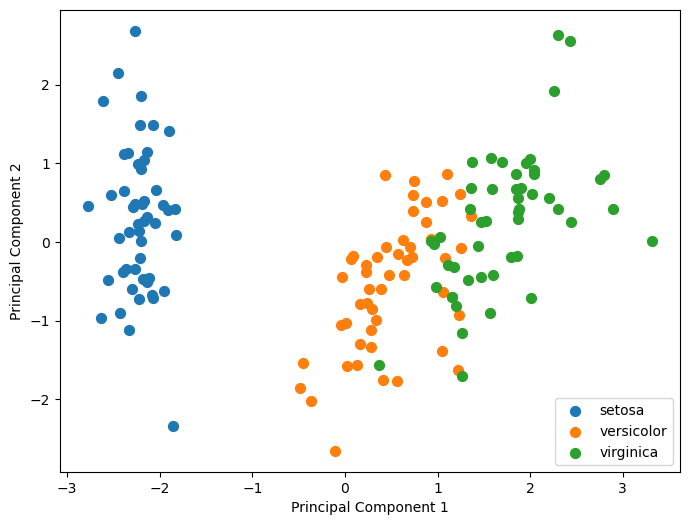

In [45]:
# Plot the PCA result
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    indices = np.where(y == target)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=target_names[target], s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA of Standardised Iris Dataset')
plt.legend()
#plt.grid(True)
plt.show()

#### Example 2: Digits dataset

This dataset consists of 64 features per sample, representing pixel intensity values for handwritten digits. We standardise the data to ensure that each feature contributes equally, and then apply PCA to reduce it to two dimensions. This makes visualisation and interpretation easier while preserving as much variance as possible.

In [46]:
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [47]:
# Print the shapes of the data arrays
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (features): (1797, 64)
Shape of y (labels): (1797,)


In [48]:
# Create a DataFrame for a more convenient preview of the data
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

In [49]:
# Display the first few rows of the DataFrame
print("\nPreview of the dataset:")
df.head()


Preview of the dataset:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1797 non-null   float64
 1   feature_1   1797 non-null   float64
 2   feature_2   1797 non-null   float64
 3   feature_3   1797 non-null   float64
 4   feature_4   1797 non-null   float64
 5   feature_5   1797 non-null   float64
 6   feature_6   1797 non-null   float64
 7   feature_7   1797 non-null   float64
 8   feature_8   1797 non-null   float64
 9   feature_9   1797 non-null   float64
 10  feature_10  1797 non-null   float64
 11  feature_11  1797 non-null   float64
 12  feature_12  1797 non-null   float64
 13  feature_13  1797 non-null   float64
 14  feature_14  1797 non-null   float64
 15  feature_15  1797 non-null   float64
 16  feature_16  1797 non-null   float64
 17  feature_17  1797 non-null   float64
 18  feature_18  1797 non-null   float64
 19  feature_19  1797 non-null  

In [51]:
# Standardise the dataset: scale features to have mean=0 and variance=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [52]:
# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [53]:
# Display the explained variance ratio for each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.12033916 0.09561054]


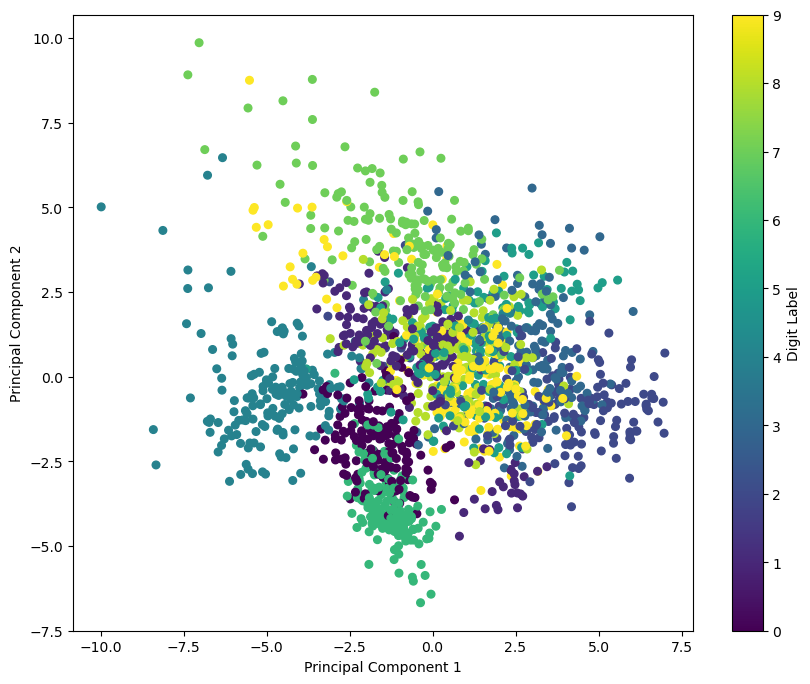

In [54]:
# Plot the PCA result: each point is coloured by its digit label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA of the Standardised Digits Dataset')
plt.colorbar(scatter, label='Digit Label')
#plt.grid(True)
plt.show()

### Exercise: Breast Cancer Wisconsin dataset

This is a widely recognised medical dataset that includes features computed from breast mass cell nuclei images. 
This dataset is well-suited to demonstrate PCA for dimensionality reduction in a medical context.

Objective: Perform a PCA and also visualise the PC dimensions.

Discuss your findings.

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [55]:
# Load the packages
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [56]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)


#### Visualise the t-SNE Components

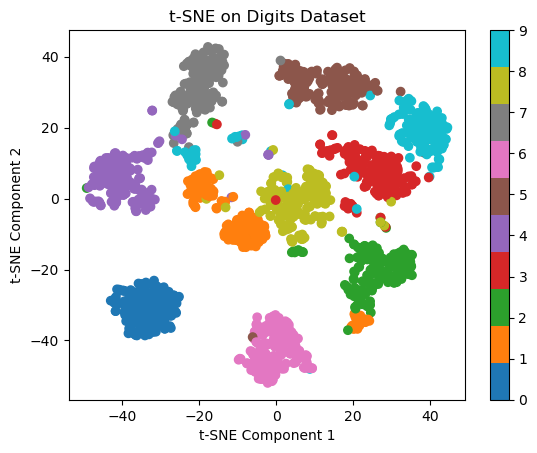

In [57]:
# Plot t-SNE result
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap='tab10')
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE on Digits Dataset')
plt.show()

###### Exercise: Perform the task on the digit dataset using UMAP appraoch.

Discuss your findings.

### Uniform Manifold Approximation and Projection (UMAP)

In [21]:
#!pip install umap-learn

#### Wine Dataset
The Wine dataset is a classic benchmark from the UCI Machine Learning Repository, and it is included in scikit-learn. It comprises 178 samples of wines from three different cultivars, each described by 13 chemical features. These features include measures such as alcohol content, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavonoids, and more. The target variable classifies the wine into one of three types. This dataset is widely used to evaluate classification algorithms and to explore multivariate statistical techniques.

Dimensionality reduction is particularly useful for this dataset. Techniques like Principal Component Analysis (PCA) help to simplify the high-dimensional space by projecting it into a lower-dimensional space (typically 2 or 3 dimensions) while retaining most of the variance. This reduction not only aids in visualisation—allowing us to observe clusters and potential separations among the classes—but also helps to reduce noise and redundant information, which can improve the performance of subsequent machine learning models.

In [58]:
# Load the packages 
import umap.umap_ as umap
from sklearn.datasets import load_wine

In [59]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [60]:
# Create a DataFrame with feature names
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

In [61]:
# Preview the first few rows of the DataFrame
print("Preview of the Wine dataset:")
df.head()

Preview of the Wine dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [63]:
# Standardise the dataset: scale features to have mean=0 and variance=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [64]:
# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_std)

#### Visualise the UMAP components

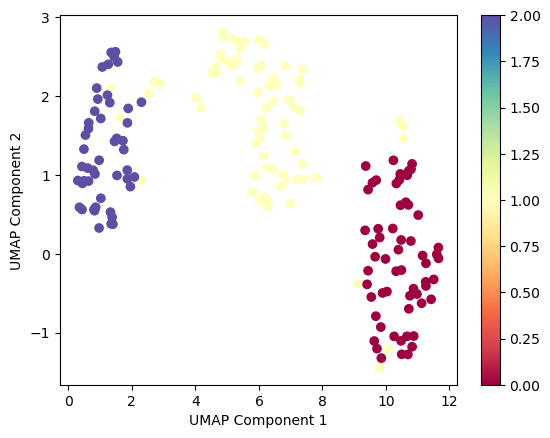

In [65]:
# Plot UMAP result
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=wine.target, cmap='Spectral')
plt.colorbar()
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
#plt.title('UMAP on Wine Dataset')
plt.show()

### Autoencoder

In [66]:
#!pip install tensorflow

In [67]:
# Load dataset
digits = load_digits()
X = digits.data
X = MinMaxScaler().fit_transform(X) # scale the dataset

In [68]:
# Define Autoencoder
input_dim = X.shape[1]
encoding_dim = 32

In [69]:
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img) # define encoder 
decoded = Dense(input_dim, activation='sigmoid')(encoded) # define the decoder

In [70]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [71]:
# Train Autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, verbose=0)

In [72]:
encoder = Model(input_img, encoded)
X_encoded = encoder.predict(X)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### Visualise the Autoencoder Results

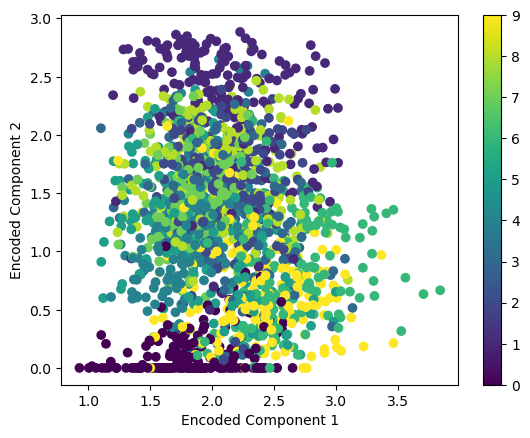

In [73]:
# Plot Autoencoder result
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=digits.target, cmap='viridis')
plt.colorbar()
plt.xlabel('Encoded Component 1')
plt.ylabel('Encoded Component 2')
#plt.title('Autoencoder on Digits Dataset')
plt.show()

### Clustering 